# Breast Cancer Prediction

Importing Libraries

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix 

Load Data

In [2]:
df=pd.read_csv(r"E:\Study\Artificial Intelligence real\Datasets\Csv data\breast cancer data.csv")
df=df.iloc[:,0:32]
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Visualizing the Data

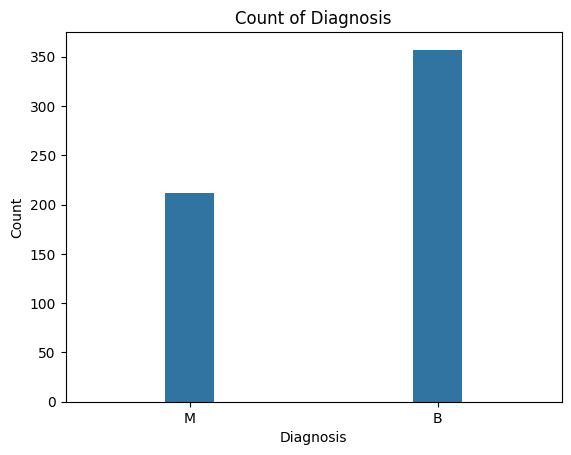

In [3]:
sns.countplot(x='diagnosis',data=df, width=0.2)
plt.title('Count of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

Histogram

<Axes: xlabel='area_mean', ylabel='Count'>

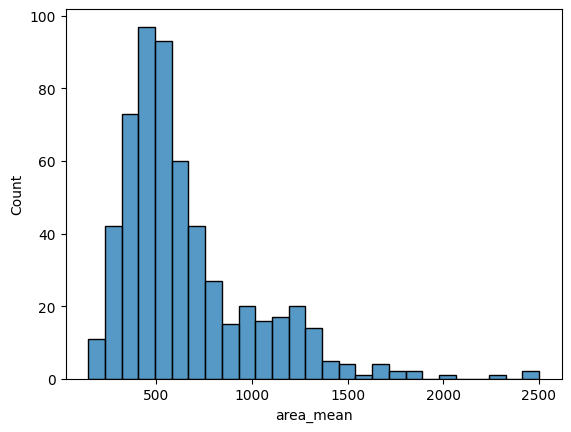

In [4]:
sns.histplot(data=df,x='area_mean')


Encoding Catagorical Column into Numeric

In [5]:
df['diagnosis'].replace({'B':1,'M':0}, inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11136\370194694.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['diagnosis'].replace({'B':1,'M':0}, inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11136\370194694.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnosis'].repla

Heatmap of correlation between data

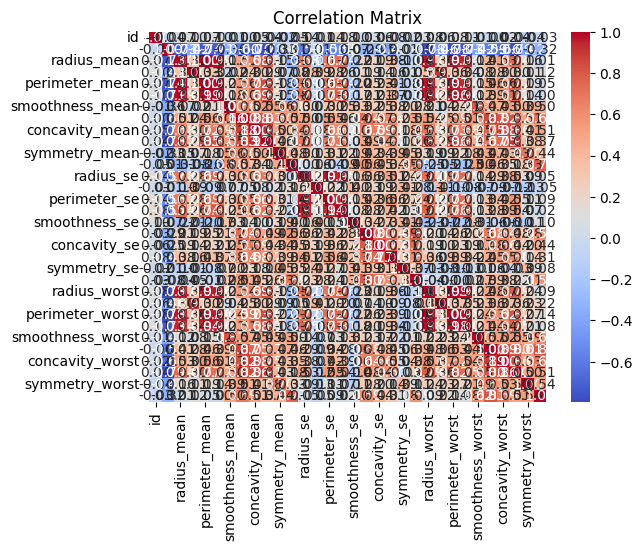

In [6]:
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Boxplot to check outlier in data

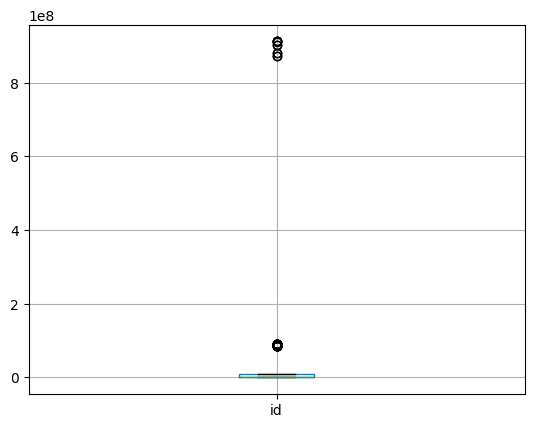

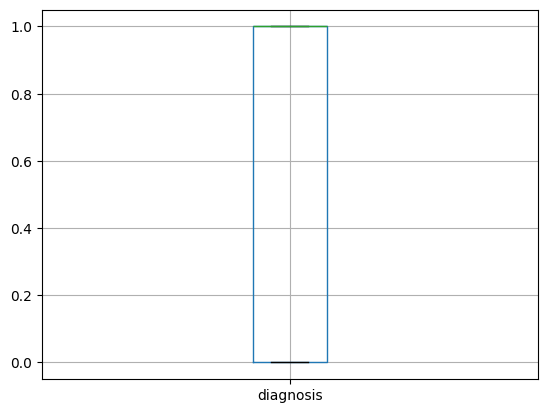

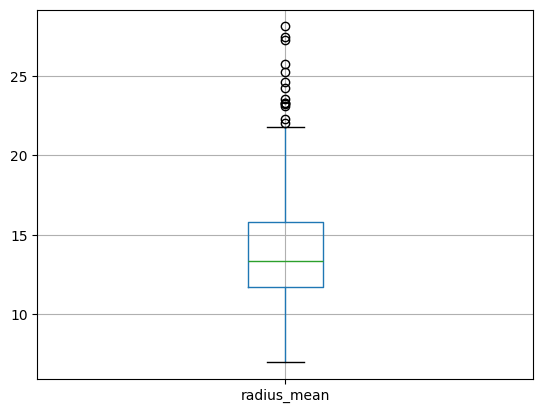

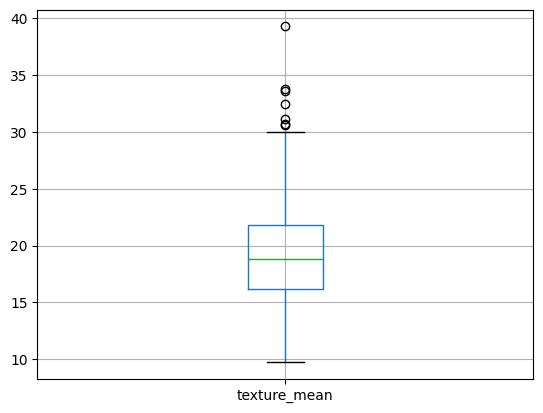

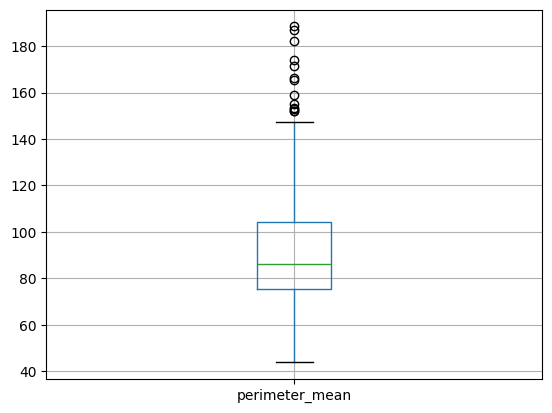

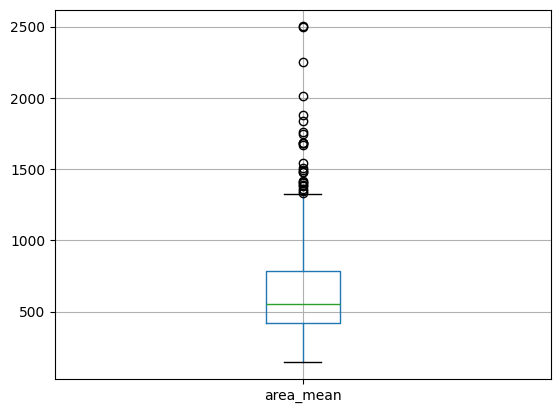

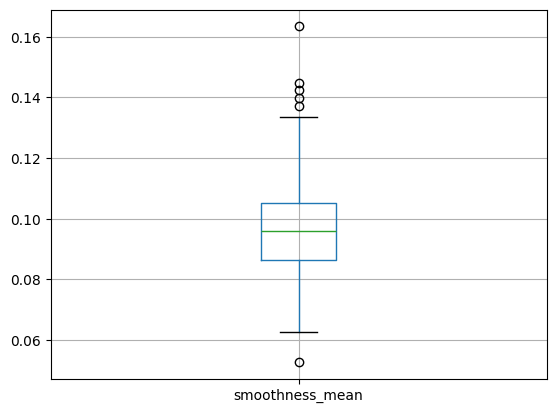

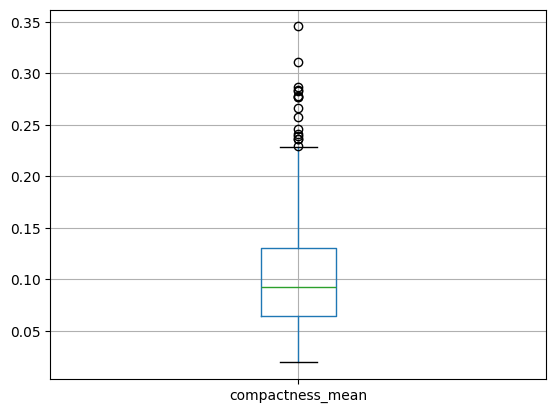

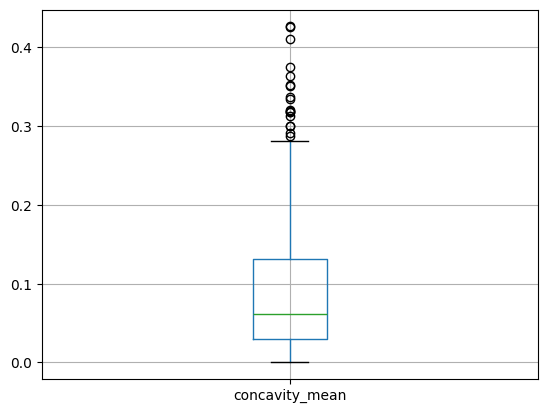

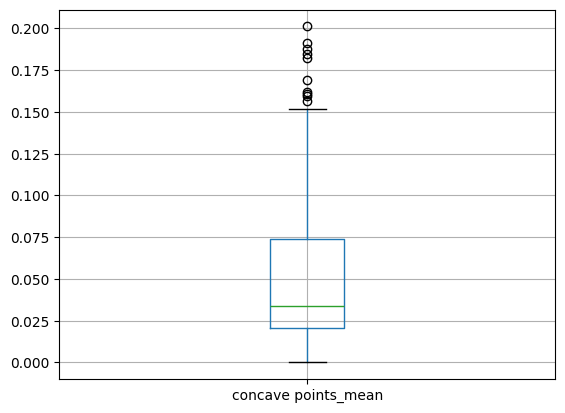

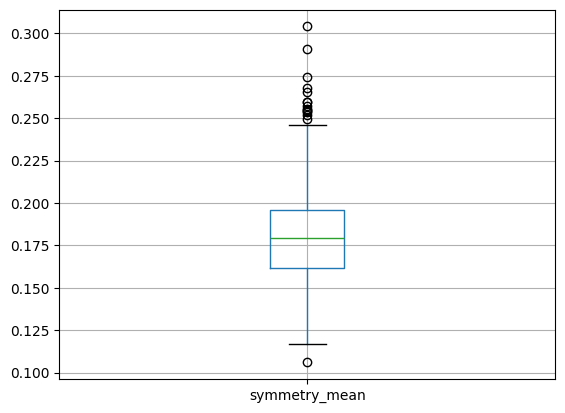

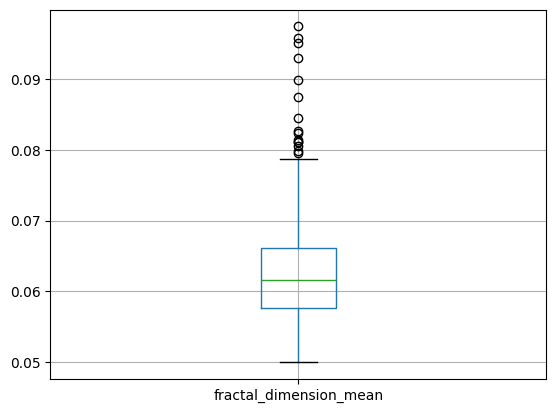

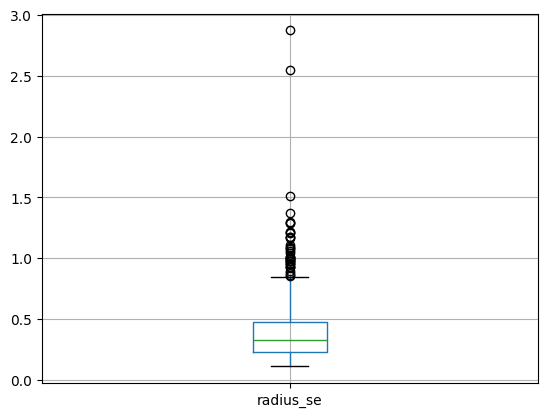

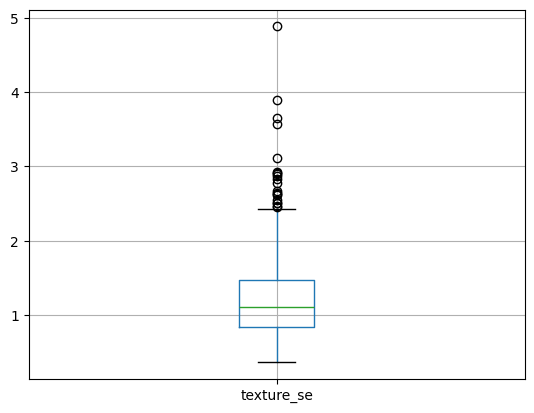

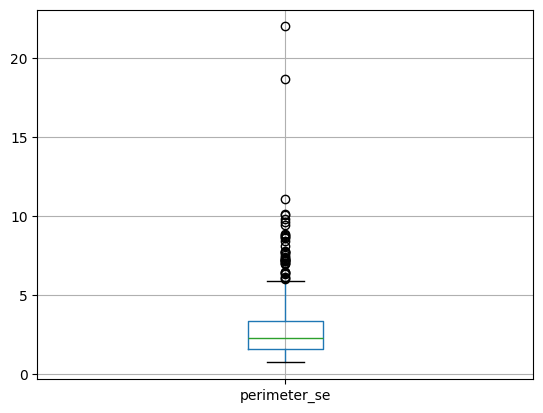

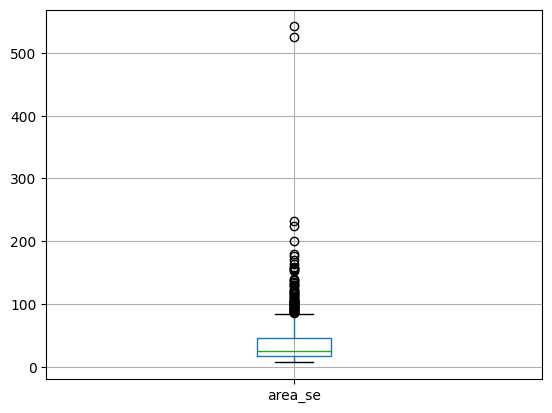

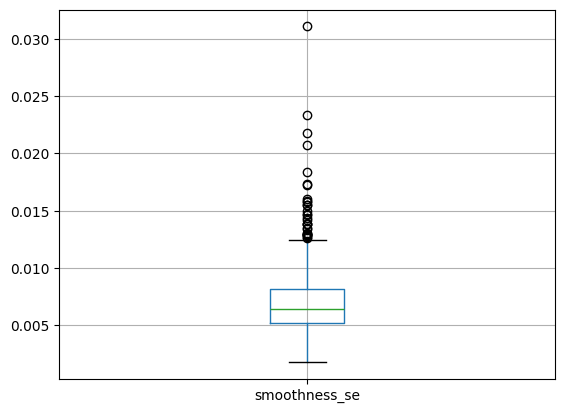

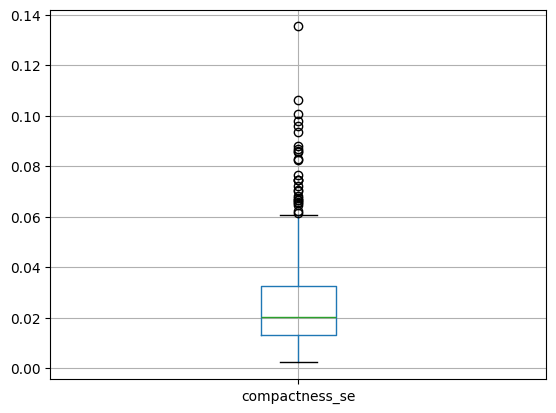

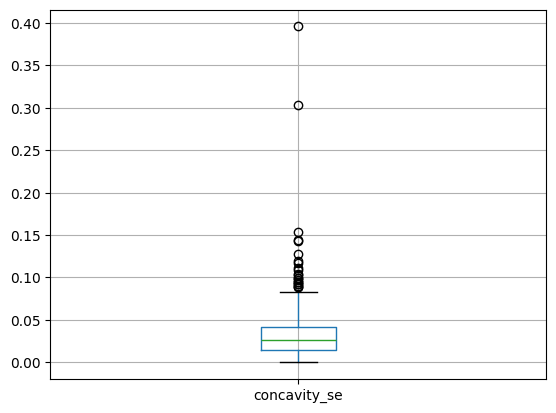

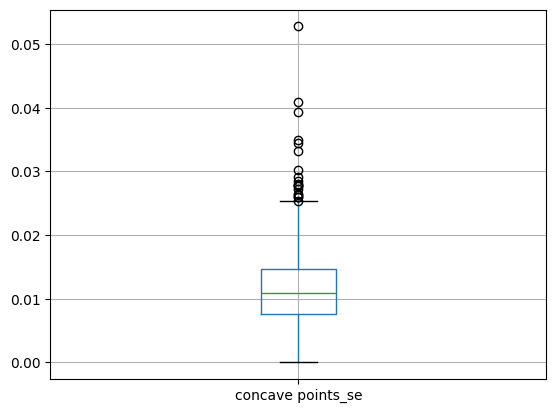

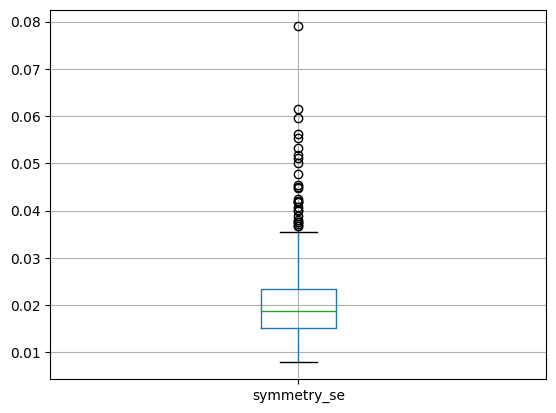

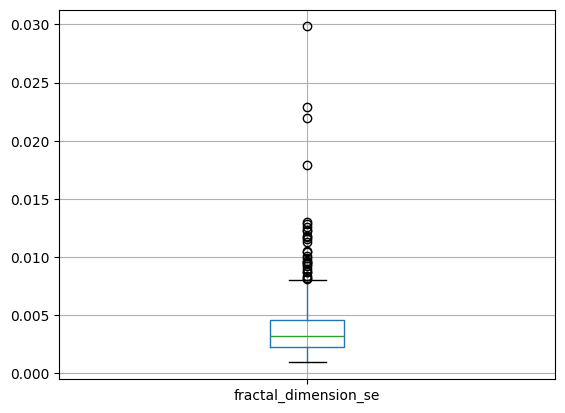

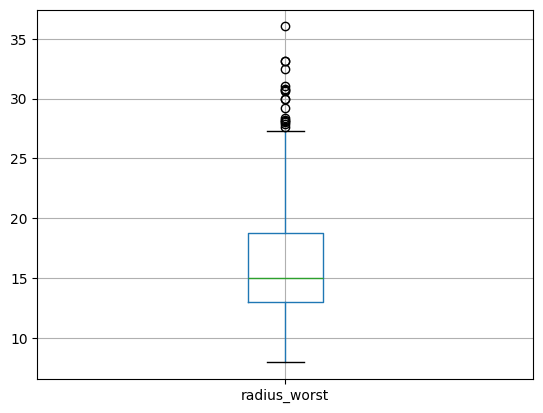

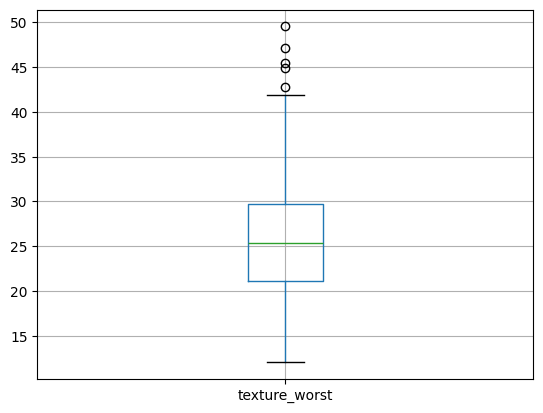

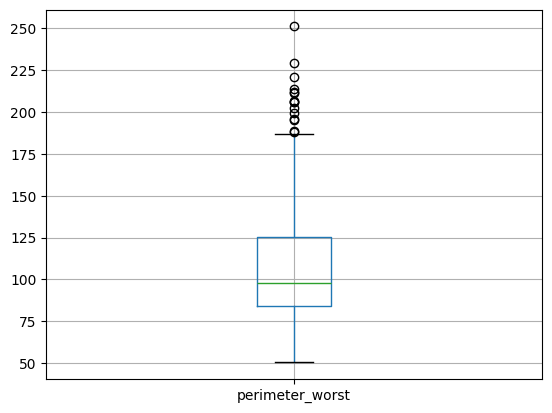

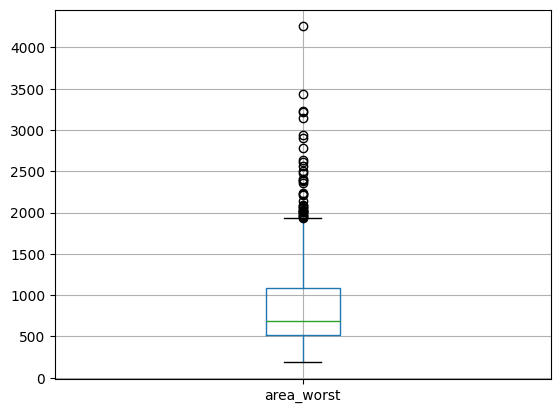

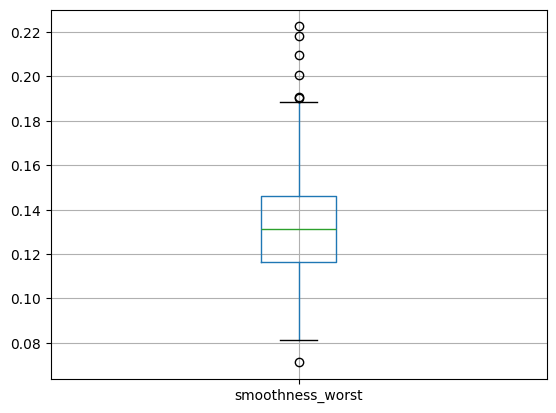

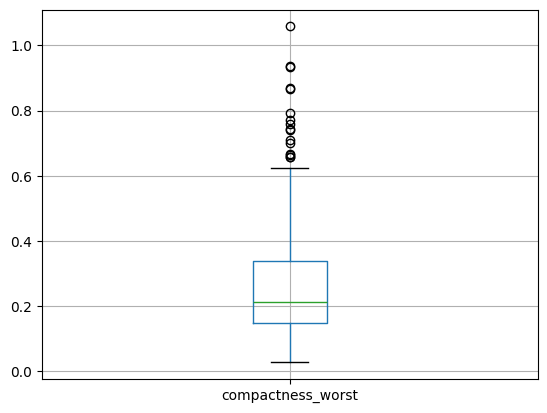

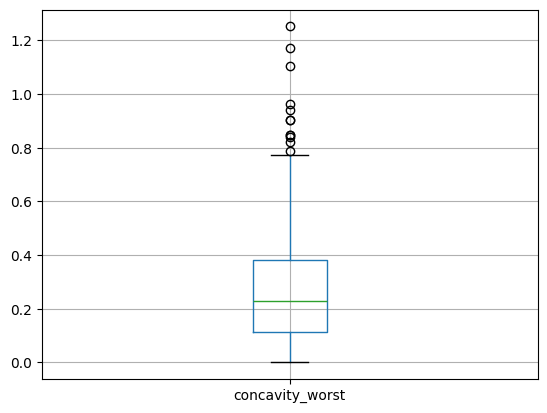

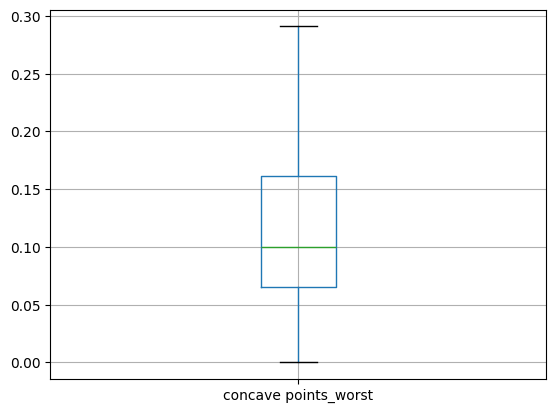

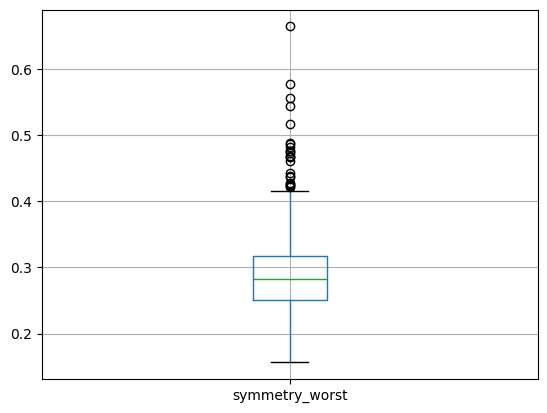

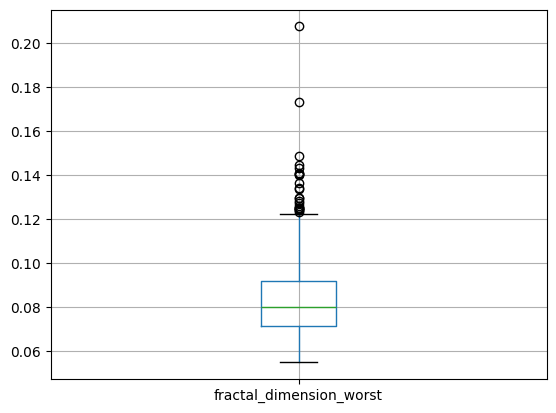

In [7]:
for col in df.columns:
    boxplot=df.boxplot(column=col)
    plt.show()

Handling the outliers using IQR

In [8]:
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        lower_bound=Q1-1.5*IQR
        upper_bound=Q3+1.5*IQR
        df=df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

Feature scaling

In [9]:
scaler=MinMaxScaler()
df_scaled=scaler.fit_transform(df)

Converting data back to pandas DataFrame as it converted into numpy array after feature scaling

In [10]:
df=pd.DataFrame(data=df_scaled,columns=df.columns)
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.933733,1.0,0.598638,0.235801,0.612653,0.521275,0.576565,0.421960,0.559530,0.638915,...,0.652824,0.279969,0.667420,0.584886,0.681695,0.422918,0.550564,0.823003,0.610429,0.319855
1,0.933758,1.0,0.542690,0.304260,0.578801,0.450663,0.735251,0.733506,0.383543,0.415609,...,0.584729,0.327533,0.609138,0.480461,0.542640,0.719593,0.435384,0.465367,0.716258,0.528575
2,0.933777,1.0,0.107760,0.138438,0.110988,0.075339,0.651904,0.310387,0.248195,0.277429,...,0.108060,0.140758,0.109299,0.072076,0.555676,0.238050,0.204262,0.397891,0.341002,0.435961
3,0.092920,1.0,0.536609,0.441684,0.522937,0.456459,0.446478,0.124591,0.215113,0.390619,...,0.450770,0.417247,0.421376,0.370989,0.171211,0.035110,0.111334,0.320319,0.104294,0.073639
4,0.092945,0.0,0.586475,0.601927,0.588975,0.516242,0.312306,0.278967,0.261125,0.271415,...,0.744363,0.704950,0.712625,0.684136,0.305812,0.502780,0.480304,0.710543,0.619121,0.294330


Seperating Dependent and Independent Variables

In [11]:
x=df.drop(df.columns[1],axis=1)
y=df['diagnosis']

Spliting the Dataset into Train and Test sets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Model Training

In [13]:
model=RandomForestClassifier(n_estimators=100, criterion='gini')
model.fit(X_train,y_train)


RandomForestClassifier()

Prediction

In [14]:
model.predict(X_test)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Score

In [15]:
model.score(X_test,y_test)

0.9787234042553191

Cross Validation

In [16]:
scores=cross_val_score(model,x,y,cv=100)
print(list(scores))

c:\Python311\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 14 members, which is less than n_splits=100.
  warnings.warn(


[np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(0.6666666666666666), np.float64(1.0), np.float64(1.0), np.float64(0.6666666666666666), np.float64(0.6666666666666666), np.float64(1.0), np.float64(0.6666666666666666), np.float64(0.6666666666666666), np.float64(1.0), np.float64(1.0), np.float64(0.6666666666666666), np.float64(0.6666666666666666), np.float64(0.6666666666666666), np.float64(0.6666666666666666), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0

Finding Prediction of model

In [17]:
y_pred=model.predict(X_test)
y_pred_prob=model.predict_proba(X_test)[:,1]

Model Evaluation


In [18]:
accuracy=accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred, average='weighted')
recall=recall_score(y_test, y_pred, average='weighted')
f1=f1_score(y_test, y_pred, average='weighted')
cof_mat=confusion_matrix(y_test, y_pred)
auc=roc_auc_score(y_test, y_pred_prob)

Printing the Matrix

In [19]:
print("\n Evaluation Metrics")
print("Accuracy of the model is : ", accuracy)
print("Precision of the model is : ", precision)
print("Recall of the model is : ", recall)
print("F1 Score of the model is : ", f1)
print("AUC-ROC score of the model is : ", auc)
print("\n The confusion matrix of the model is given below : ")
print("\n",cof_mat)


 Evaluation Metrics
Accuracy of the model is :  0.9787234042553191
Precision of the model is :  0.9791859389454208
Recall of the model is :  0.9787234042553191
F1 Score of the model is :  0.9752942093367627
AUC-ROC score of the model is :  1.0

 The confusion matrix of the model is given below : 

 [[ 1  1]
 [ 0 45]]
